# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [147]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [110]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

572

In [188]:
#Step to slice initial data to reduce testing API Calls: 
#Just modify or remove the number o items instead of 15: "cities[:15]"
cities_shorted = cities[:15]
cities_shorted

['touros',
 'louisbourg',
 'sentyabrskiy',
 'qaanaaq',
 'attawapiskat',
 'new norfolk',
 'jumla',
 'chokurdakh',
 'kloulklubed',
 'severo-kurilsk',
 'bredasdorp',
 'dicabisagan',
 'provideniya',
 'varhaug',
 'cap-aux-meules']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [177]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Create lists to collect data
city= []
lat=[]
lng=[]
temp= []
mxtemp = []
humid = []
speed = []
clouds = []
country = []
date = []


for x in range(len(cities_shorted)):
    response = requests.get(query_url + str(cities_shorted[x])).json()
    
    try:
        city.append(response["name"])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        mxtemp.append(response['main']['temp_max'])
        speed.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Making request number: {x} for ID: {cities_shorted[x]}")

    except:
        #Append null values
        print(f"City request number: {x} for ID: {cities_shorted[x]} Not Found")
        pass


Making request number: 0 for ID: touros
City request number: 1 for ID: louisbourg Not Found
City request number: 2 for ID: sentyabrskiy Not Found
Making request number: 3 for ID: qaanaaq
City request number: 4 for ID: attawapiskat Not Found
Making request number: 5 for ID: new norfolk
Making request number: 6 for ID: jumla
Making request number: 7 for ID: chokurdakh
Making request number: 8 for ID: kloulklubed
Making request number: 9 for ID: severo-kurilsk
Making request number: 10 for ID: bredasdorp
Making request number: 11 for ID: dicabisagan
Making request number: 12 for ID: provideniya
Making request number: 13 for ID: varhaug
Making request number: 14 for ID: cap-aux-meules
City request number: 15 for ID: taolanaro Not Found
City request number: 16 for ID: ambodifototra Not Found
Making request number: 17 for ID: kapaa
Making request number: 18 for ID: katsuura
Making request number: 19 for ID: cayenne
Making request number: 20 for ID: limbe
Making request number: 21 for ID: bar

Making request number: 182 for ID: yar-sale
Making request number: 183 for ID: klaksvik
Making request number: 184 for ID: naze
Making request number: 185 for ID: ketou
Making request number: 186 for ID: banda aceh
Making request number: 187 for ID: los llanos de aridane
Making request number: 188 for ID: aguimes
Making request number: 189 for ID: aksu
Making request number: 190 for ID: mormugao
Making request number: 191 for ID: tonekabon
Making request number: 192 for ID: linqing
Making request number: 193 for ID: saint george
Making request number: 194 for ID: alofi
Making request number: 195 for ID: bud
City request number: 196 for ID: samusu Not Found
Making request number: 197 for ID: rypefjord
Making request number: 198 for ID: srednekolymsk
Making request number: 199 for ID: moron
Making request number: 200 for ID: norman wells
Making request number: 201 for ID: vostok
Making request number: 202 for ID: meulaboh
Making request number: 203 for ID: marzuq
Making request number: 2

City request number: 365 for ID: hendijan Not Found
Making request number: 366 for ID: kununurra
Making request number: 367 for ID: tolstoy-yurt
Making request number: 368 for ID: ikungi
Making request number: 369 for ID: bagdarin
Making request number: 370 for ID: varca
Making request number: 371 for ID: kostomuksha
Making request number: 372 for ID: ganganagar
Making request number: 373 for ID: axim
Making request number: 374 for ID: orange cove
Making request number: 375 for ID: havoysund
Making request number: 376 for ID: maridi
Making request number: 377 for ID: kuito
Making request number: 378 for ID: bichura
Making request number: 379 for ID: opuwo
Making request number: 380 for ID: semey
Making request number: 381 for ID: ancud
City request number: 382 for ID: ngukurr Not Found
Making request number: 383 for ID: namibe
Making request number: 384 for ID: benalla
Making request number: 385 for ID: shebalino
Making request number: 386 for ID: talaya
Making request number: 387 for 

Making request number: 549 for ID: yayva
Making request number: 550 for ID: zlobin
Making request number: 551 for ID: dharchula
Making request number: 552 for ID: banff
Making request number: 553 for ID: faridpur
Making request number: 554 for ID: sleaford
City request number: 555 for ID: tunxi Not Found
Making request number: 556 for ID: corpus christi
Making request number: 557 for ID: camacha
City request number: 558 for ID: deh rawud Not Found
City request number: 559 for ID: xiangdong Not Found
Making request number: 560 for ID: anadyr
Making request number: 561 for ID: aklavik
Making request number: 562 for ID: ambulu
Making request number: 563 for ID: teguldet
Making request number: 564 for ID: altamira
Making request number: 565 for ID: bhimunipatnam
Making request number: 566 for ID: sao joao da barra
Making request number: 567 for ID: batagay-alyta
Making request number: 568 for ID: ljubovija
Making request number: 569 for ID: tarpon springs
Making request number: 570 for ID:

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [178]:
weather_response_dict = {
    "City": city,
    "Lat": lat,
    "Lng": lng,
    "Temperature": temp,
    "Max Temp": mxtemp,
    "Humidity": humid,
    "Cloudiness": clouds,
    "Wind Speed": speed,
    "Country": country,
    "Date": date
}

weather_data = pd.DataFrame(weather_response_dict)
weather_data.head()

,City,Lat,Lng,Temperature,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Touros,-5.1989,-35.4608,27.00,27.00,78,40,2.57,BR,1613268475
1,Qaanaaq,77.4840,-69.3632,-13.55,-13.55,76,0,2.63,GL,1613268476
2,New Norfolk,-42.7826,147.0587,21.18,23.33,35,0,1.34,AU,1613268476
3,Jumla,29.2747,82.1838,5.19,5.19,63,100,1.34,NP,1613268477
4,Chokurdakh,70.6333,147.9167,-28.45,-28.45,78,0,0.56,RU,1613268477


In [179]:
weather_data.describe()

,Lat,Lng,Temperature,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,5.190000e+02
mean,19.256870,21.396899,8.571002,8.851464,75.508671,54.780347,3.395549,1.613269e+09
std,34.156797,91.045575,18.426344,18.436155,17.483788,40.917021,2.724177,6.884852e+01
min,-54.800000,-175.200000,-39.430000,-39.430000,10.000000,0.000000,0.180000,1.613268e+09
25%,-9.858500,-57.715650,-4.590000,-4.000000,68.000000,4.000000,1.510000,1.613269e+09
50%,22.285500,25.415500,14.820000,15.560000,79.000000,75.000000,2.570000,1.613269e+09
75%,49.783600,105.679350,23.890000,24.000000,88.000000,98.000000,4.600000,1.613269e+09
max,78.218600,178.416700,32.000000,32.000000,100.000000,100.000000,21.440000,1.613269e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [180]:
# filtering data 
try:
    filtered_data = weather_data[weather_data.Humidity > 100]
    count =  len(filtered_data["City"])
    print(f"There are {count} cities with Humidity over 100%")
    
except 0:
    print("There are no Cities with Humidity over 100%")




There are 0 cities with Humidity over 100%


In [181]:
#  Get the indices of cities that have humidity over 100%.
indexes = weather_data.index[weather_data['Humidity'] > 100].tolist()

In [182]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
cities_analysis = weather_data[weather_data.Humidity <= 100]
cities_analysis.head()

,City,Lat,Lng,Temperature,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Touros,-5.1989,-35.4608,27.00,27.00,78,40,2.57,BR,1613268475
1,Qaanaaq,77.4840,-69.3632,-13.55,-13.55,76,0,2.63,GL,1613268476
2,New Norfolk,-42.7826,147.0587,21.18,23.33,35,0,1.34,AU,1613268476
3,Jumla,29.2747,82.1838,5.19,5.19,63,100,1.34,NP,1613268477
4,Chokurdakh,70.6333,147.9167,-28.45,-28.45,78,0,0.56,RU,1613268477


In [186]:
#Export to CSV cities being analyzed
cities_analysis.to_csv(r'output_data/cities.csv', index = False)

In [187]:
#  Get cities by index that have humidity over 100%.
for x in range(len(indexes)):
    print(weather_data.iloc[x])

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

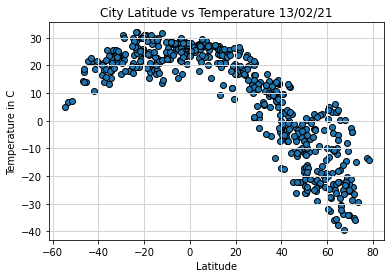

This graph show the temperature of each city according to their latitude


In [189]:
x_values = cities_analysis['Lat']
y_values = cities_analysis['Temperature']
plt.scatter(x_values,y_values,edgecolors="black")
plt.title('City Latitude vs Temperature 13/02/21')
plt.xlabel('Latitude')
plt.ylabel('Temperature in C')

plt.grid(color='#d3d3d3', linestyle='-', linewidth=1, axis='both')

plt.show()
print("This graph show the temperature of each city according to their latitude")

## Latitude vs. Humidity Plot

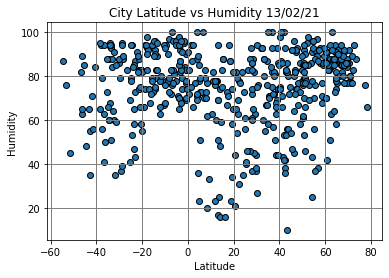

This graph show the humidity percentage level of each city according to their latitude


In [190]:
x_values = cities_analysis['Lat']
y_values = cities_analysis['Humidity']
plt.scatter(x_values,y_values,edgecolors="black")
plt.title('City Latitude vs Humidity 13/02/21')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(color='grey', linestyle='-', linewidth=1, axis='both')
plt.savefig('Latitude_v_humidity.png')
plt.show()
print("This graph show the humidity percentage level of each city according to their latitude")

## Latitude vs. Cloudiness Plot

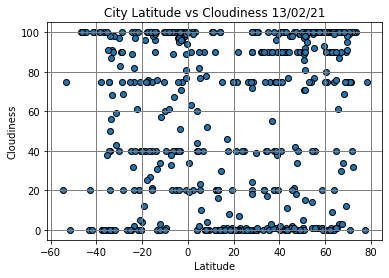

This graph show the cloudiness in percentage of each city according to their latitude


In [191]:
x_values = cities_analysis['Lat']
y_values = cities_analysis['Cloudiness']
plt.scatter(x_values,y_values,edgecolors="black")
plt.title('City Latitude vs Cloudiness 13/02/21')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(color='grey', linestyle='-', linewidth=1, axis='both')
plt.savefig('Latitude_v_cloudiness.png')
plt.show()
print("This graph show the cloudiness in percentage of each city according to their latitude")

## Latitude vs. Wind Speed Plot

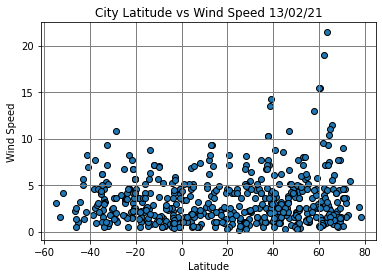

This graph show the wind speed in km of each city according to their latitude


In [192]:
x_values = cities_analysis['Lat']
y_values = cities_analysis['Wind Speed']
plt.scatter(x_values,y_values,edgecolors="black")
plt.title('City Latitude vs Wind Speed 13/02/21')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(color='grey', linestyle='-', linewidth=1, axis='both')
plt.savefig('Latitude_v_wind_speed.png')
plt.show()
print("This graph show the wind speed in km of each city according to their latitude")

## Linear Regression

In [193]:
northern_emisphere = cities_analysis[cities_analysis.Lat >= 0]
southern_emisphere = cities_analysis[cities_analysis.Lat < 0]

Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7551787675317655


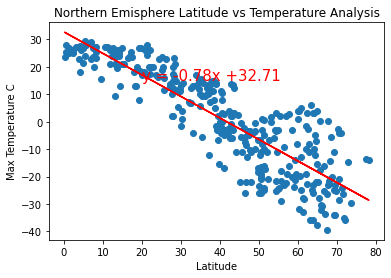

In [194]:
# Perform a linear regression on temperature vs. latitude from the northern emisphere greater than or equal to 0 degrees latitude
x_values = northern_emisphere["Lat"]
y_values = northern_emisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature C')
plt.title("Northern Emisphere Latitude vs Temperature Analysis")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('Northern_emisphere_lat_v_maxtemp.png')
# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.239134159138429


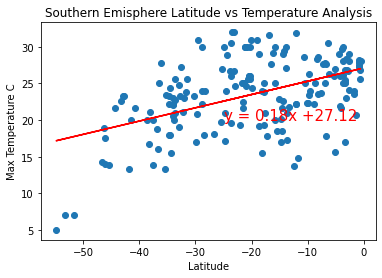

In [195]:
# Perform a linear regression on temperature vs. latitude from the northern emisphere greater than or equal to 0 degrees latitude
x_values = southern_emisphere["Lat"]
y_values = southern_emisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature C')
plt.title("Southern Emisphere Latitude vs Temperature Analysis")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('Southern_emisphere_lat_v_maxtemp.png')
# Show plot
plt.show()

In [196]:
print("Theres clear evidence that as you approach to the poles temperatures drops, r-values help concludes that a linear regression can predict the temperature")

Theres clear evidence that as you approach to the poles temperatures drops, r-values help concludes that a linear regression can predict the temperature


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.08630325623487306


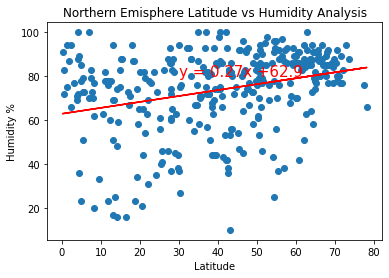

In [197]:
# Perform a linear regression on temperature vs. latitude from the northern emisphere greater than or equal to 0 degrees latitude
x_values = northern_emisphere["Lat"]
y_values = northern_emisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title("Northern Emisphere Latitude vs Humidity Analysis")
plt.annotate(line_eq,(30,80),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('Northern_emisphere_lat_v_humidity.png')
# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.08461757703765499


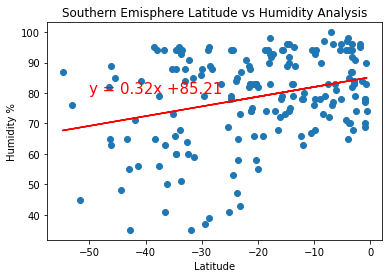

In [199]:
# Perform a linear regression on temperature vs. latitude from the northern emisphere greater than or equal to 0 degrees latitude
x_values = southern_emisphere["Lat"]
y_values = southern_emisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title("Southern Emisphere Latitude vs Humidity Analysis")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('Southern_emisphere_lat_v_humidity.png')
# Show plot
plt.show()

In [ ]:
print("there is no signifficant diference in humidity levels according to the geographical location, the r-values are far from 1")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0863218387069684


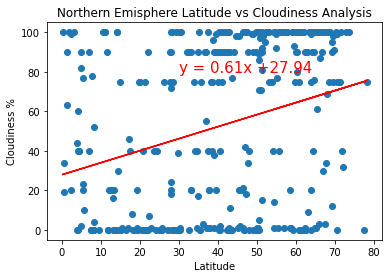

In [200]:
# Perform a linear regression on temperature vs. latitude from the northern emisphere greater than or equal to 0 degrees latitude
x_values = northern_emisphere["Lat"]
y_values = northern_emisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("Northern Emisphere Latitude vs Cloudiness Analysis")
plt.annotate(line_eq,(30,80),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('Northern_emisphere_lat_v_cloudiness.png')
# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04741658769609883


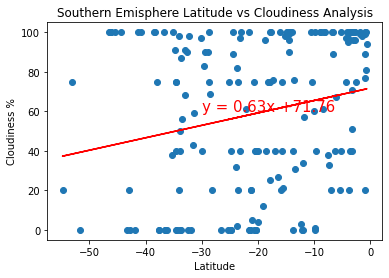

In [201]:
# Perform a linear regression on temperature vs. latitude from the northern emisphere greater than or equal to 0 degrees latitude
x_values = southern_emisphere["Lat"]
y_values = southern_emisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("Southern Emisphere Latitude vs Cloudiness Analysis")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('Southern_emisphere_lat_v_cloudiness.png')
# Show plot
plt.show()

In [202]:
print("There in no clear difference in the Cloudiness levels from the northern or southern emispheres according to the location")

There in no clear difference in the Cloudiness levels from the northern or southern emispheres according to the location


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.009629490570505163


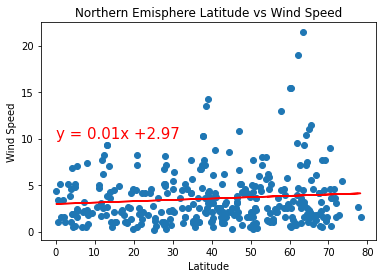

In [205]:
# Perform a linear regression on temperature vs. latitude from the northern emisphere greater than or equal to 0 degrees latitude
x_values = northern_emisphere["Lat"]
y_values = northern_emisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Emisphere Latitude vs Wind Speed")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('Northern_emisphere_lat_v_wind_speed.png')
# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.025820414513452142


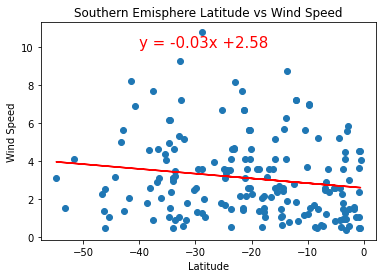

In [207]:
# Perform a linear regression on temperature vs. latitude from the northern emisphere greater than or equal to 0 degrees latitude
x_values = southern_emisphere["Lat"]
y_values = southern_emisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Emisphere Latitude vs Wind Speed")
plt.annotate(line_eq,(-40,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('Southern_emisphere_lat_v_wind_speed.png')
# Show plot
plt.show()

In [208]:
print("There is no difference in wind speed according to latitude location in both emispheres")

There is no difference in wind speed according to latitude location in both emispheres
